# Rotation representation

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# rotate 180 deg in 4 sec
w01,w02,w03=np.zeros((100,1)),np.zeros((100,1)),180/4*np.pi/180*np.ones((100,1))
w1=np.concatenate((w01,w02,w03),axis=1)

# roll 60 in a 1 sec than pitch 100 in 2 sec
dt=0.1

w01,w02,w03=90*np.pi/180*np.ones((10,1)),np.zeros((10,1)),0*np.ones((10,1))
w011,w022,w033=0*np.pi/180*np.ones((20,1)),np.zeros((20,1)),90/2*np.pi/180*np.ones((20,1))

# w01,w02,w03=0*np.pi/180*np.ones((10,1)),np.zeros((10,1)),90*np.pi/180*np.ones((10,1))
# w011,w022,w033=90/2*np.pi/180*np.ones((20,1)),np.zeros((20,1)),0/2*np.pi/180*np.ones((20,1))


w11,w22,w33=np.concatenate((w01,w011),axis=0),np.concatenate((w02,w022),axis=0),np.concatenate((w03,w033),axis=0)
w2=np.concatenate((w11,w22,w33),axis=1)
# and the other way around

# w01,w02,w03=0*np.pi/180*np.ones((10,1)),np.zeros((10,1)),90*np.pi/180*np.ones((10,1))
# w011,w022,w033=90/2*np.pi/180*np.ones((20,1)),np.zeros((20,1)),0/2*np.pi/180*np.ones((20,1))

w013,w023,w033=0*np.pi/180*np.ones((10,1)),90*np.pi/180*np.ones((10,1)),0*np.ones((10,1))
w0113,w0223,w0333=0*np.pi/180*np.ones((20,1)),np.zeros((20,1)),90/2*np.pi/180*np.ones((20,1))
w113,w223,w333=np.concatenate((w013,w0113),axis=0),np.concatenate((w023,w0223),axis=0),np.concatenate((w033,w0333),axis=0)
w3=np.concatenate((w113,w223,w333),axis=1)


## quaternions

In [3]:
# dq=0.5*w*q
def dq(q,w):
    # w shape=[1,3]
    # q=[w,i,j,k]
    ww=np.array([0,w[0],w[1],w[2]])
    return 0.5*quatMul(q,ww)
    
def quatMul(q1,q2):
    # q1 = [q1w,q1i,q1j,q1k]
    # q2 = [q2w,q2i,q2j,q2k]
    # qout=[
    #     q1w*(q2w,q2i,q2j,q2k)+  
    #     q1i*(q2w,q2i,q2j,q2k)
    #     q1j*(q2w,q2i,q2j,q2k)
    #     q1k*(q2w,q2i,q2j,q2k)]
    # qout=[
    #     q1w*q2w + q1w*q2i*i + q1w*q2j*j + q1w*q2k*k +  
    #     q1i*q2w*i - q1i*q2i + q1i*q2j*k - q1i*q2k*j +
    #     q1j*q2w*j - q1j*q2i*k - q1j*q2j + q1j*q2k*i
    #     q1k*q2w*k + q1k*q2i*j - q1k*q2j*i - q1k*q2k]
    # qout=[
    #     q1w*q2w - q1i*q2i - q1j*q2j - q1k*q2k,  +  
    #     q1i*q2w*i  + q1w*q2i*i + q1j*q2k*i  - q1k*q2j*i +
    #     q1j*q2w*j + q1w*q2j*j - q1i*q2k*j + q1k*q2i*j 
    #     q1w*q2k*k + q1k*q2w*k + q1i*q2j*k - q1j*q2i*k  ]
    q1w,q1i,q1j,q1k=q1
    q2w,q2i,q2j,q2k=q2
    qout=[
        q1w*q2w - q1i*q2i - q1j*q2j - q1k*q2k, 
        q1i*q2w  + q1w*q2i + q1j*q2k  - q1k*q2j,
        q1j*q2w + q1w*q2j - q1i*q2k + q1k*q2i,
        q1w*q2k + q1k*q2w + q1i*q2j - q1j*q2i]
    return np.array(qout)

def quatRotVec(q,v):
    v_q=np.array([0,v[0],v[1],v[2]])
    v_out=quatMul(quatMul(q,v_q),np.array([q[0],-q[1],-q[2],-q[3]]))
    return v_out[1:]

In [4]:
# dq=0.5*w*q
def dq(q,w):
    # w shape=[1,3]
    # q=[w,i,j,k]
    ww=np.array([0,w[0],w[1],w[2]])
    return 0.5*quatMul(q,ww)
    
def quatMul(q1,q2):

    q1w,q1i,q1j,q1k=q1
    q2w,q2i,q2j,q2k=q2
    qout=[
        q1w*q2w - q1i*q2i - q1j*q2j - q1k*q2k, 
        q1i*q2w  + q1w*q2i + q1j*q2k  - q1k*q2j,
        q1j*q2w + q1w*q2j - q1i*q2k + q1k*q2i,
        q1w*q2k + q1k*q2w + q1i*q2j - q1j*q2i]
    return np.array(qout)

def quatRotVec(q,v):
    v_q=np.array([0,v[0],v[1],v[2]])
    v_out=quatMul(quatMul(q,v_q),np.array([q[0],-q[1],-q[2],-q[3]]))
    return v_out[1:]

In [5]:
def quat2mat(q):
#     qw,qi,qj,qk=q
#     R11=1-2*(qj**2+qk**2)
#     R12=2*(qi*qj-qk*qw)
#     R13=2*(qi*qk+qj*qw)
#     R22=1-2*(qi**2+qk**2)
#     R23=2*(qj*qk-qi*qw)
#     R33=1-2*(qi**2+qj**2)
#     R=np.array([[R11,R12,R13],
#                 [-R12,R22,R23],
#                 [-R13,-R23,R33]])
    
    
    q0 = q[0]
    q1 = q[1]
    q2 = q[2]
    q3 = q[3]
     
    # First row of the rotation matrix
    r00 = 2 * (q0 * q0 + q1 * q1) - 1
    r01 = 2 * (q1 * q2 - q0 * q3)
    r02 = 2 * (q1 * q3 + q0 * q2)
     
    # Second row of the rotation matrix
    r10 = 2 * (q1 * q2 + q0 * q3)
    r11 = 2 * (q0 * q0 + q2 * q2) - 1
    r12 = 2 * (q2 * q3 - q0 * q1)
     
    # Third row of the rotation matrix
    r20 = 2 * (q1 * q3 - q0 * q2)
    r21 = 2 * (q2 * q3 + q0 * q1)
    r22 = 2 * (q0 * q0 + q3 * q3) - 1
     
    # 3x3 rotation matrix
    rot_matrix = np.array([[r00, r01, r02],
                           [r10, r11, r12],
                           [r20, r21, r22]])
    return rot_matrix

def mat2eul(R):
    R23,R33,R11,R12=-R[1,2], R[2,2], R[0,0],-R[0,1]
    R13=-R[0,2]
    theta1=np.arcsin(-R13)
    theta2=np.pi-theta1
    
#     phi1=np.arccos(R33/np.cos(theta1))
#     phi2=np.arccos(R33/np.cos(theta2))
    phi1=np.arctan2(R23/np.cos(theta1),R33/np.cos(theta1))
    phi2=np.arctan2(R23/np.cos(theta2),R33/np.cos(theta2))
    
    yaw1=np.arctan2(R12/np.cos(theta1),R11/np.cos(theta1))
    yaw2=np.arctan2(R12/np.cos(theta2),R11/np.cos(theta2))
    print(R12,R11)
    
    return np.array([[yaw1,theta1,phi1],
                     [yaw2,theta2,phi2]])

In [6]:
# print(quatMul([1,1,1,1],[1,1,1,1]))
q0=np.array([1,0,0,0])
# print((q0+dq(q0,w1[0])*0.25)/np.sqrt(np.sum((q0+dq(q0,w1[0])*0.25)**2)))
q1=(q0+dq(q0,w1[0])*0.25)/np.sqrt(np.sum((q0+dq(q0,w1[0])*0.25)**2))
# print((q1+dq(q1,w1[0])*0.25)/np.sqrt(np.sum((q1+dq(q1,w1[0])*0.25)**2)))
for i in [0,1,2,3,4]:
    q=q0
    dqq=dq(q,w1[0])
    print('dqq=',dqq)
    q2=q+dqq*0.25
    print('q before norm',q2)
    
    norm_q=np.sqrt(np.sum(q2**2))
    q2=q2/norm_q
    print('q after norm',q2, 'with norm ',norm_q)
    print('q after norm',q2, 'with norm ',norm_q)
    print('ang=', 2*np.arccos(q2[0])*57)
    print("angs=",mat2eul(quat2mat(q2))*57)
    print()
    q0=q2

dqq= [0.         0.         0.         0.39269908]
q before norm [1.         0.         0.         0.09817477]
q after norm [0.99521542 0.         0.         0.09770504] with norm  1.0048075863308055
q after norm [0.99521542 0.         0.         0.09770504] with norm  1.0048075863308055
ang= 11.156173359835007
0.19447513397612645 0.9809074483685842
angs= [[  11.15617336    0.           -0.        ]
 [-167.91460789  179.07078125  179.07078125]]

dqq= [-0.03836868  0.          0.          0.39082018]
q before norm [0.98562325 0.         0.         0.19541009]
q after norm [0.98090745 0.         0.         0.19447513] with norm  1.0048075863308052
q after norm [0.98090745 0.         0.         0.19447513] with norm  1.0048075863308052
ang= 22.312346719669737
0.3815242148793218 0.9243588445299353
angs= [[  22.31234672    0.           -0.        ]
 [-156.75843453  179.07078125  179.07078125]]

dqq= [-0.07637021  0.          0.          0.38520145]
q before norm [0.9618149 0.        0.     

In [7]:
q_tot=np.empty(len(w2))
eul=np.empty(len(w2))

q0=np.array([1,0,0,0])
print("ang=",mat2eul(quat2mat(q0))*57)

for i in range(len(w2)):
    q=q0
    dqq=dq(q,w2[i,:])
    print('dqq=',dqq)
    q2=q+dqq*dt
    print('q before norm',q2)
    
    norm_q=np.sqrt(np.sum(q2**2))
    q2=q2/norm_q
    print('q after norm',q2, 'with norm ',norm_q)
    print('q after norm',q2, 'with norm ',norm_q)
    print("ang=",mat2eul(quat2mat(q2))*57)
    print('ang=', 2*np.arccos(q2[0])*57)
    print()
    q0=q2


0 1
ang= [[   0.            0.            0.        ]
 [-179.07078125  179.07078125 -179.07078125]]
dqq= [0.         0.78539816 0.         0.        ]
q before norm [1.         0.07853982 0.         0.        ]
q after norm [0.99692994 0.07829869 0.         0.        ] with norm  1.0030795096853893
q after norm [0.99692994 0.07829869 0.         0.        ] with norm  1.0030795096853893
-0.0 0.9999999999999998
ang= [[  -0.            0.            8.93519692]
 [ 179.07078125  179.07078125 -170.13558433]]
ang= 8.93519692436313

dqq= [-0.06149565  0.78298695  0.          0.        ]
q before norm [0.99078038 0.15659739 0.         0.        ]
q after norm [0.98773863 0.15611663 0.         0.        ] with norm  1.0030795096853893
q after norm [0.98773863 0.15611663 0.         0.        ] with norm  1.0030795096853893
-0.0 0.9999999999999998
ang= [[  -0.            0.           17.87039385]
 [ 179.07078125  179.07078125 -161.20038741]]
ang= 17.870393848726177

dqq= [-0.12261371  0.7757681  

## rotation matrix

In [8]:
def dR(R,w):
    # dR=w*R
    w_skew=np.array([[0, -w[2], w[1]],
                [w[2], 0, -w[0]],
                [-w[1], w[0], 0]])

    return -w_skew@R

def updateR1st(R,dt,w):
    return R+dR(R,w)*dt
    
def updateR12nd(R,dt,w):
    w_skew=np.array([[0, w[2], w[1]],
                [w[2], 0, -w[0]],
                [-w[1], w[0], 0]])
    dRR=dR(R,w)
    
    return R + dt*dRR + dt*dt*w_skew*dRR/2

## euler

In [9]:
def euler2mat(yaw,pitch,roll):
    sy,cy=np.sin(yaw),np.cos(yaw)
    sp,cp=np.sin(pitch),np.cos(pitch)
    sr,cr=np.sin(roll),np.cos(roll)
    Ry=np.array([[cy, -sy, 0],
                [sy,  cy,  0],
                [0,   0,   1]])
    
    Rp=np.array([[cp, 0, sp],
                 [0,  1,  0],
                [-sp,  0, cp,]])
    
    Rr=np.array([[1, 0,  0],
                [0, cr, -sr],
                [0,sr, cr]])
 
    return Ry@Rp@Rr

def eulerUpdate(yaw,pitch,roll,w,dt):
    
    sy,cy=np.sin(yaw),np.cos(yaw)
    sp,cp=np.sin(pitch),np.cos(pitch)
    sr,cr=np.sin(roll),np.cos(roll)
    
    C=np.array([[1, 0, -sp],
               [0, cr, sr*cp],
               [0, -sr, cr*cp]])

    deul=np.linalg.inv(C)@w
    droll,dpitch,dyaw=deul

    yaw = yaw + dyaw*dt
    pitch = pitch + dpitch*dt
    roll = roll + droll*dt
    
    return yaw,pitch,roll
    

## simulations

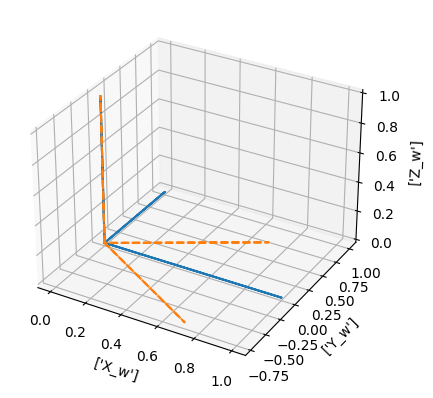

In [10]:
ax = plt.axes(projection='3d')
xw=np.array([1,0,0])
yw=np.array([0,1,0])
zw=np.array([0,0,1])
xb=np.array([1/np.sqrt(2),-1/np.sqrt(2),0])
yb=np.array([1/np.sqrt(2),1/np.sqrt(2),0])
zb=np.array([0,0,1])
ax.plot3D([0,xw[0],0,yw[0],0,zw[0],0],
          [0,xw[1],0,yw[1],0,zw[1],0],
          [0,xw[2],0,yw[2],0,zw[2],0])

ax.plot3D([0,xb[0],0,yb[0],0,zb[0],0],
          [0,xb[1],0,yb[1],0,zb[1],0],
          [0,xb[2],0,yb[2],0,zb[2],0],'--')
ax.set_xlabel(['X_w'])
ax.set_ylabel(['Y_w'])
ax.set_zlabel(['Z_w'])
plt.show()


def plotaxes(xb,yb,zb,n,kind):
    ax = plt.axes(projection='3d')
    xw=np.array([1,0,0])
    yw=np.array([0,1,0])
    zw=np.array([0,0,1])
   
    ax.plot3D([0,xw[0],0,yw[0],0,zw[0],0],
              [0,xw[1],0,yw[1],0,zw[1],0],
              [0,xw[2],0,yw[2],0,zw[2],0])
    
    for i in range(len(xb)):
        xb2=xb[i]
        yb2=yb[i]
        zb2=zb[i]
#         print("thats good ",xb2)
        ax.plot3D([0,xb2[0],0,yb2[0],0,zb2[0],0],
                  [0,xb2[1],0,yb2[1],0,zb2[1],0],
                  [0,xb2[2],0,yb2[2],0,zb2[2],0],'--')
    ax.legend(kind)
    ax.set_xlabel(['X_w'])
    ax.set_ylabel(['Y_w'])
    ax.set_zlabel(['Z_w'])
#     ax.axis('equal')
    ax.set_box_aspect([1,1,1])
    ax.text(xb2[0], xb2[1], xb2[2], 'xb')
    ax.text(yb2[0], yb2[1], yb2[2], 'yb')
    ax.text(zb2[0], zb2[1], zb2[2], 'zb')
#     ax.text(xb,'xb')
#     ax.text(yb,'yb')
#     ax.text(zb,'zb')
    plt.title(str(n))
    plt.show()

    

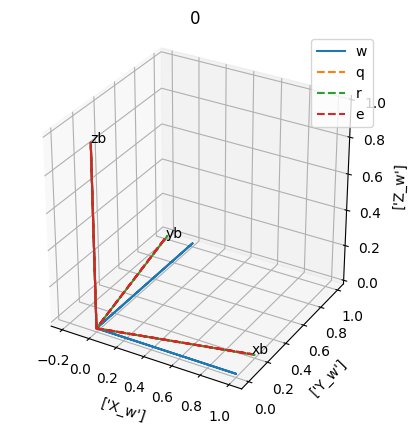

ang= 11.156173359835007

11.191923828413637 0.0 0.0


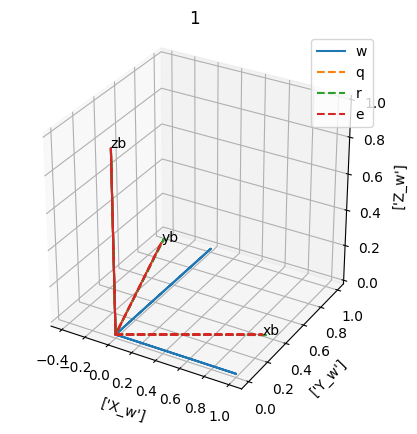

ang= 22.312346719669737

22.383847656827275 0.0 0.0


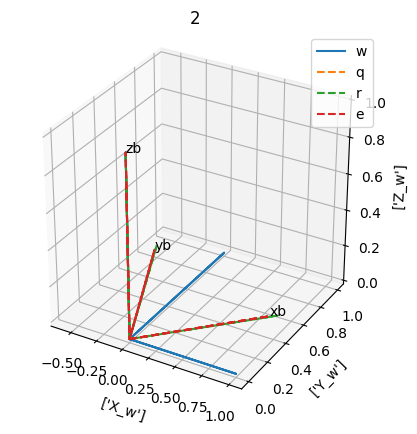

ang= 33.468520079504586

33.575771485240914 0.0 0.0


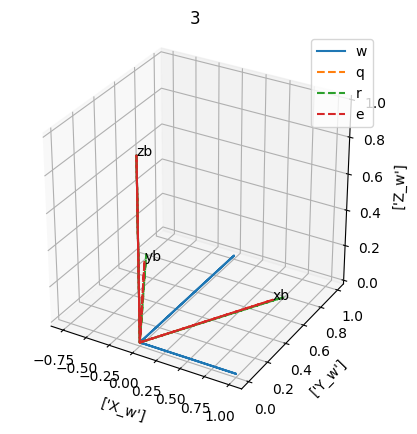

ang= 44.624693439339474

44.76769531365455 0.0 0.0


ang= 55.78086679917432

55.95961914206819 0.0 0.0


ang= 66.93704015900923

67.15154297048183 0.0 0.0


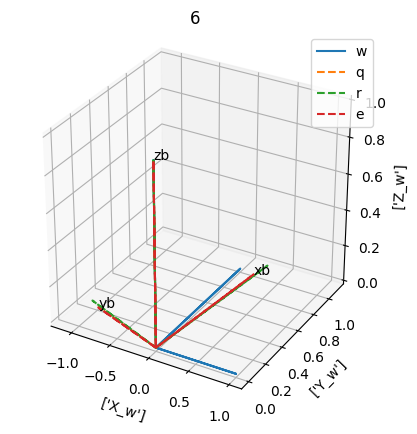

ang= 78.09321351884405

78.34346679889546 0.0 0.0


ang= 89.24938687867893

89.5353906273091 0.0 0.0


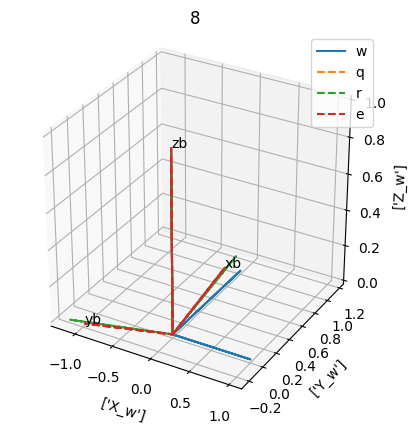

ang= 100.40556023851377

100.72731445572275 0.0 0.0


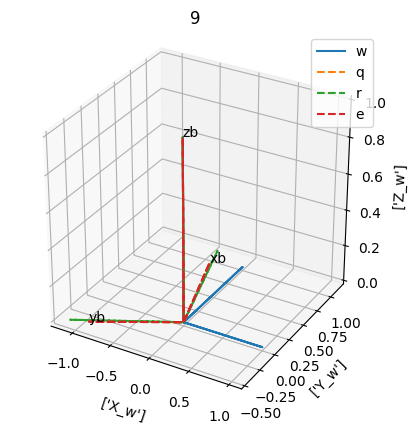

ang= 111.56173359834865

111.91923828413638 0.0 0.0


ang= 122.7179069581835

123.11116211255 0.0 0.0


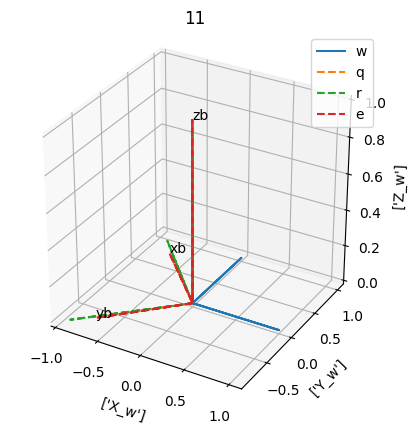

ang= 133.87408031801837

134.30308594096365 0.0 0.0


ang= 145.03025367785324

145.4950097693773 0.0 0.0


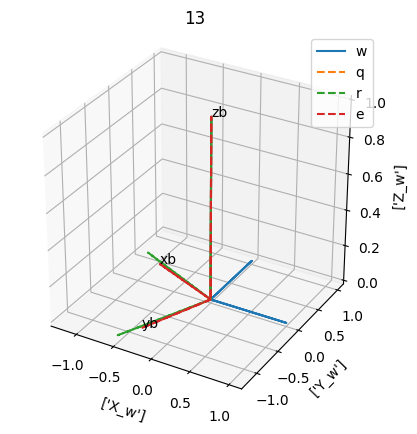

ang= 156.18642703768808

156.68693359779095 0.0 0.0


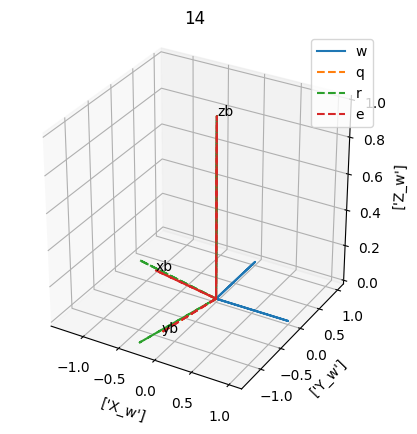

ang= 167.34260039752294

167.8788574262046 0.0 0.0


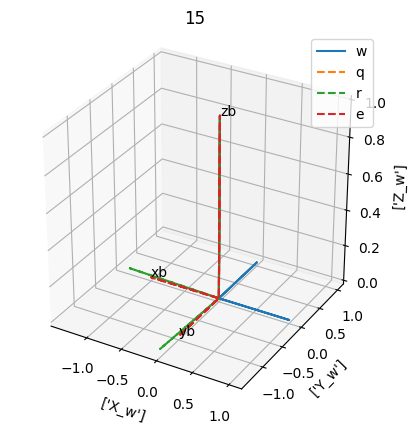

ang= 178.4987737573578

179.07078125461825 0.0 0.0


In [11]:
q0=np.array([1,0,0,0])
R0=quat2mat(q0);
vx,vy,vz=xw,yw,zw
yaw0,pitch0,roll0=0,0,0
# R_eul=euler2mat(yaw0,pitch0,roll0)
# print(R_eul@xw)
# print(R_eul@yw)
# print(R_eul@zw)
# print(w1[0])
# yaw,pitch,roll=eulerUpdate(yaw0,pitch0,roll0,w1[0],1)
# R_eul=euler2mat(yaw,pitch,roll)
# print(R_eul@xw)
# print(R_eul@yw)
# print(R_eul@zw)

for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    
    # euler
    yaw,pitch,roll=yaw0,pitch0,roll0
    yaw,pitch,roll=eulerUpdate(yaw,pitch,roll,w1[0],0.25)
    R_eul=euler2mat(yaw,pitch,roll)
#     print(R_eul)
    vxe=R_eul@xw
    vye=R_eul@yw
    vze=R_eul@zw
#     print(vxe)
#     print(vye)
    
    #rotation matrix
    R=R0
    R=updateR1st(R,0.25,w1[0])
    

    vxr=np.transpose(R)@xw
    vyr=np.transpose(R)@yw
    vzr=np.transpose(R)@zw
    
    
    q=q0
    dqq=dq(q,w1[0])
#     print('dqq=',dqq)
    q2=q+dqq*0.25
#     print('q before norm',q2)
    
    
    norm_q=np.sqrt(np.sum(q2**2))
    q2=q2/norm_q
    vx=[quatRotVec(q2,xw),vxr, vxe]
    vz=[quatRotVec(q2,zw),vzr,vze]
    vy=[quatRotVec(q2,yw),vyr,vye]
#     print(vx)

    plotaxes(vx,vy,vz,i,['w','q','r','e'])
#     print('q after norm',q2, 'with norm ',norm_q)
#     print('q after norm',q2, 'with norm ',norm_q)
    print('ang=', 2*np.arccos(q2[0])*57)
#     print("angs=",mat2eul(quat2mat(q2))*57)
    print()
    q0=q2
    R0=R
    yaw0,pitch0,roll0=yaw,pitch,roll
    print(yaw*57,pitch*57,roll*57)
    

dqq= [0.         0.78539816 0.         0.        ]


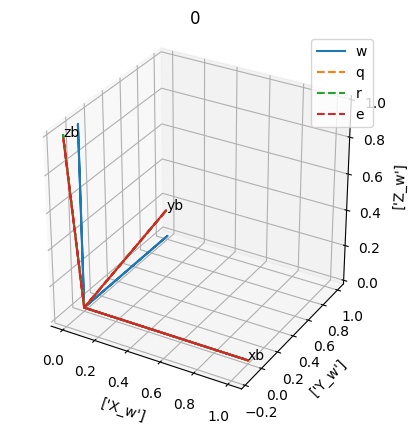

ang= 0.0

0.0 0.0 8.953539062730911
dqq= [-0.06168503  0.78539816  0.          0.        ]


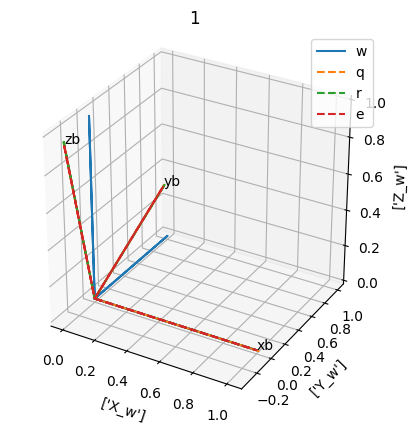

ang= 12.66873433388314

0.0 0.0 17.907078125461823
dqq= [-0.12337006  0.78055343  0.          0.        ]


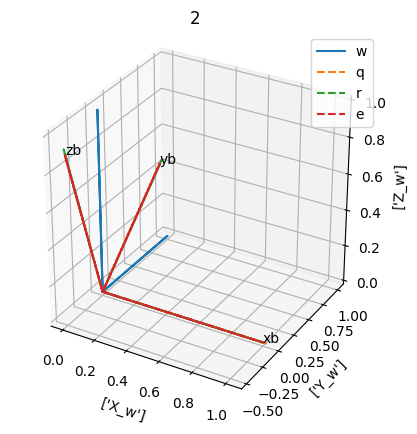

ang= 21.965564986268326

0.0 0.0 26.86061718819273
dqq= [-0.18467458  0.77086397  0.          0.        ]


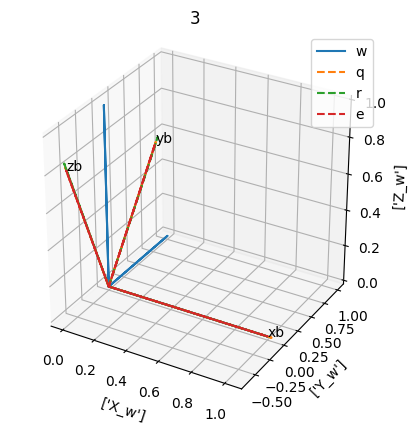

ang= 31.096338507196627

0.0 0.0 35.814156250923645
dqq= [-0.24521809  0.75635966  0.          0.        ]


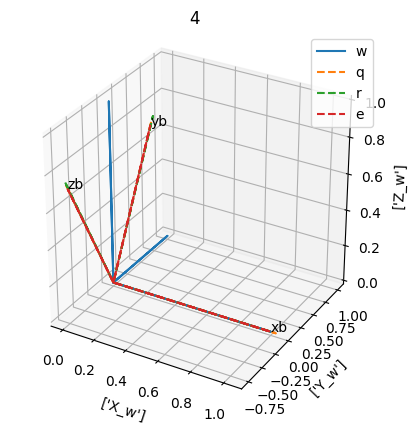

ang= 40.18741338294964

0.0 0.0 44.76769531365455
dqq= [-0.30462244  0.73710028  0.          0.        ]


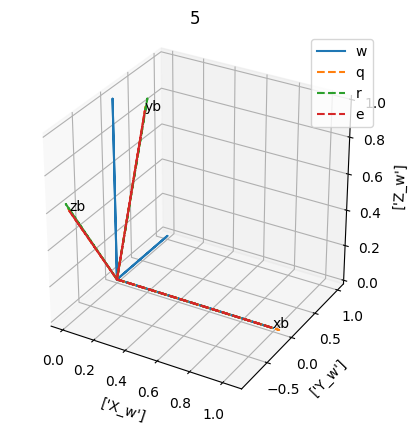

ang= 49.27174018165887

0.0 0.0 53.72123437638546
dqq= [-0.36251416  0.71317529  0.          0.        ]


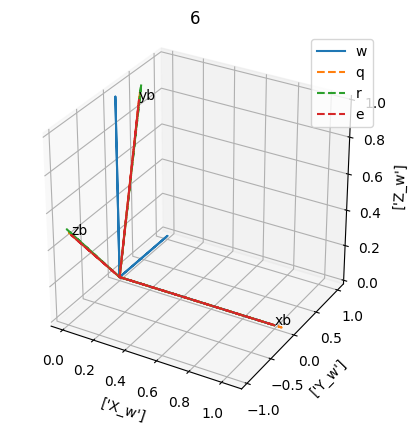

ang= 58.36214621503334

0.0 0.0 62.67477343911637
dqq= [-0.41852682  0.68470349  0.          0.        ]


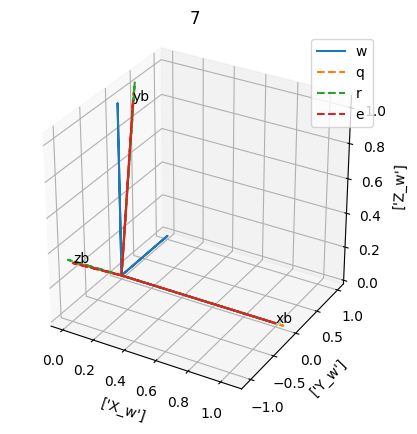

ang= 67.46499593416615

0.0 0.0 71.62831250184729
dqq= [-0.47230331  0.65183247  0.          0.        ]


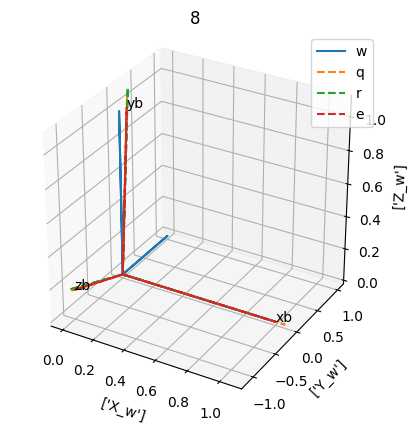

ang= 76.58411387269997

0.0 0.0 80.58185156457819
dqq= [-0.52349811  0.61473786  0.          0.        ]


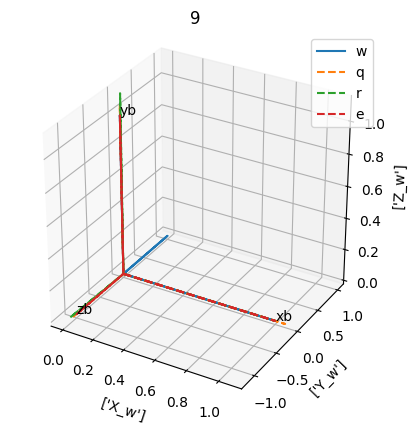

ang= 85.72222358252155

0.0 0.0 89.5353906273091
dqq= [ 0.          0.         -0.28588975  0.28681121]


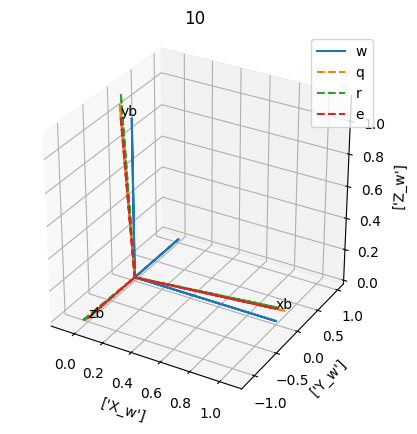

ang= 85.72222358252155

2.7412307385535503e-16 -4.476769531365456 89.5353906273091
dqq= [-0.01126305 -0.01122686 -0.28588975  0.28681121]


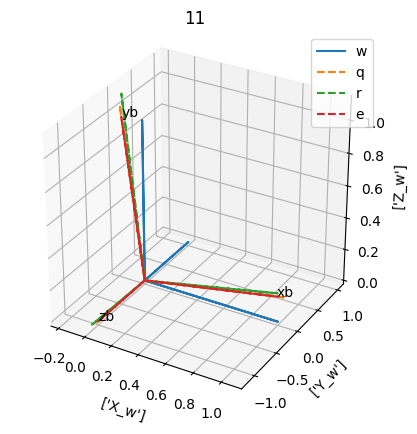

ang= 85.91003304110058

5.490937906637931e-16 -8.953539062730911 89.5353906273091
dqq= [-0.0225261  -0.02245373 -0.28544888  0.28636891]


ang= 86.28466669979449

8.266338431161492e-16 -13.430308594096365 89.5353906273091
dqq= [-0.03377178 -0.03366328 -0.28456712  0.28548431]


ang= 86.84390026035115

1.1085461772032064e-15 -17.907078125461823 89.5353906273091
dqq= [-0.04498272 -0.0448382  -0.28324517  0.2841581 ]


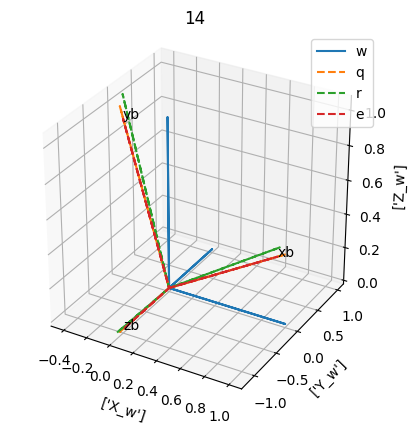

ang= 87.58434391835677

1.396776234154189e-15 -22.383847656827275 89.5353906273091
dqq= [-0.05614159 -0.05596122 -0.28148437  0.28239163]


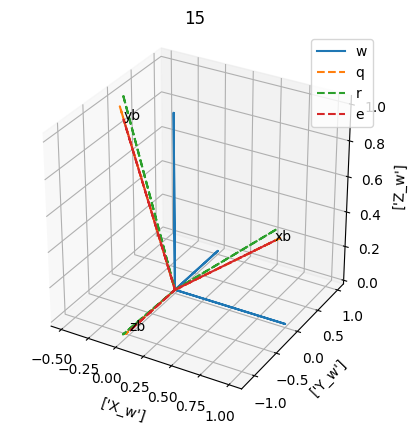

ang= 88.50154889022927

1.6934849112154011e-15 -26.86061718819273 89.5353906273091
dqq= [-0.06723108 -0.06701508 -0.27928678  0.28018695]


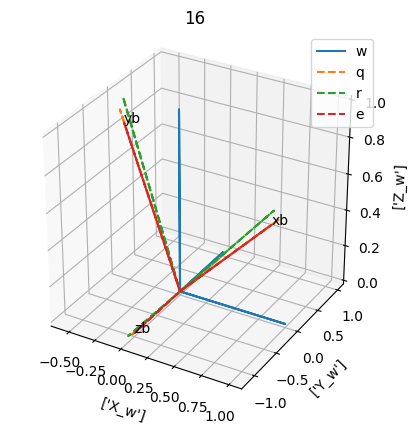

ang= 89.59013950398709

2.001140429344248e-15 -31.337386719558186 89.5353906273091
dqq= [-0.07823399 -0.07798265 -0.27665511  0.27754679]


ang= 90.84396228265375

2.322639562642776e-15 -35.814156250923645 89.5353906273091
dqq= [-0.08913323 -0.08884687 -0.27359273  0.27447455]


ang= 92.25624324034601

2.66147431612919e-15 -40.290925782289094 89.5353906273091
dqq= [-0.09991182 -0.09959083 -0.27010373  0.2709743 ]


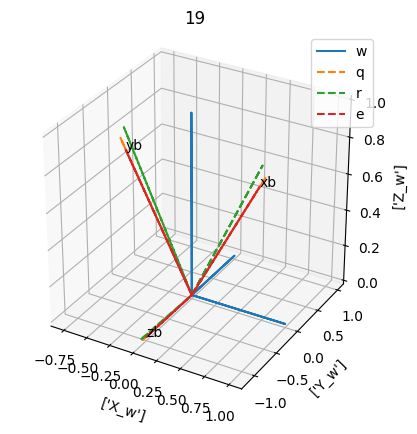

ang= 93.81974522838289

3.021970006926469e-15 -44.76769531365455 89.5353906273091
dqq= [-0.11055296 -0.11019778 -0.2661928   0.26705077]


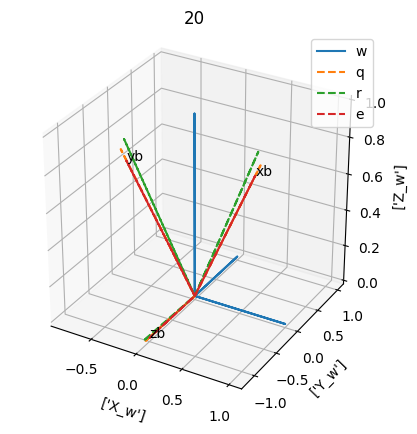

ang= 95.5269184027835

3.409638575732114e-15 -49.244464845020005 89.5353906273091
dqq= [-0.12104002 -0.12065115 -0.26186535  0.26270937]


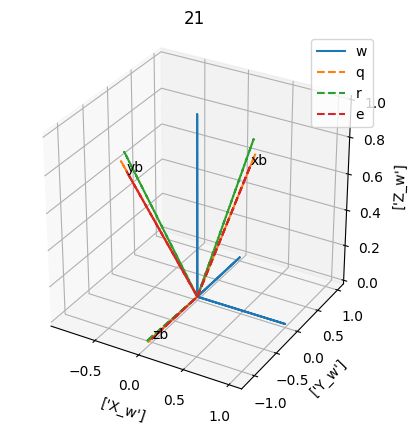

ang= 97.37003848017193

3.831724798887548e-15 -53.72123437638546 89.5353906273091
dqq= [-0.13135659 -0.13093457 -0.25712739  0.25795614]


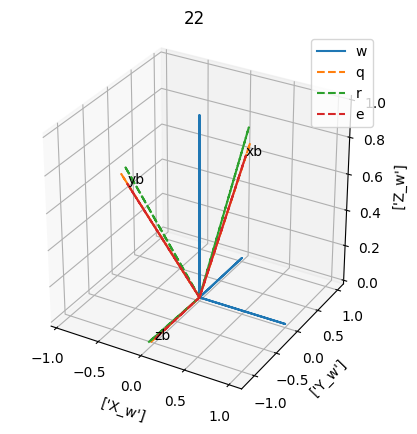

ang= 99.34132915873046

4.2980908276135556e-15 -58.198003907750916 89.5353906273091
dqq= [-0.1414865  -0.14103194 -0.2519856   0.25279778]


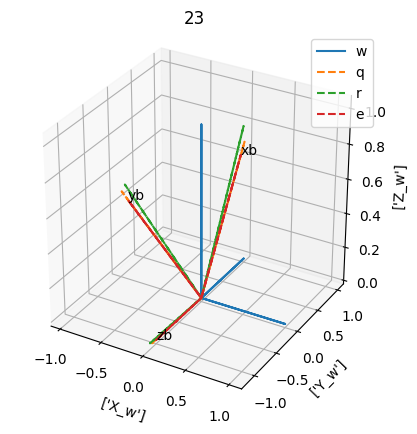

ang= 101.43306670232559

4.822729730697202e-15 -62.67477343911637 89.5353906273091
dqq= [-0.15141385 -0.15092739 -0.24644729  0.24724161]


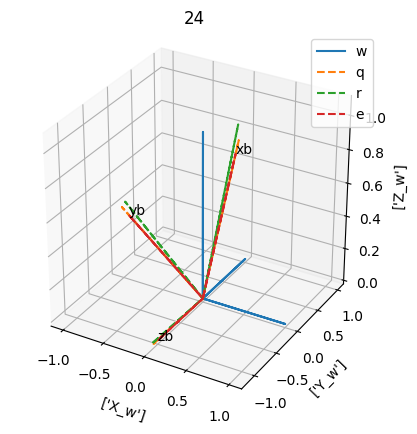

ang= 103.63766608146015

5.426537682653507e-15 -67.15154297048183 89.5353906273091
dqq= [-0.161123   -0.16060536 -0.24052038  0.24129561]


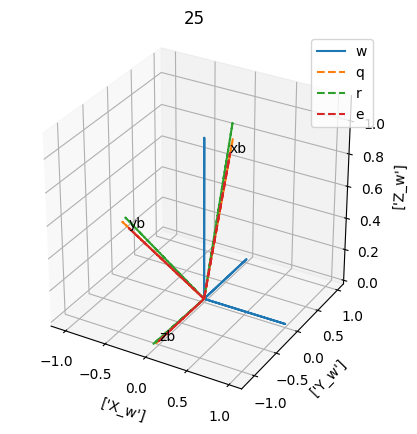

ang= 105.94774916224844

6.1428557948884635e-15 -71.62831250184729 89.5353906273091
dqq= [-0.17059866 -0.17005057 -0.23421342  0.23496832]


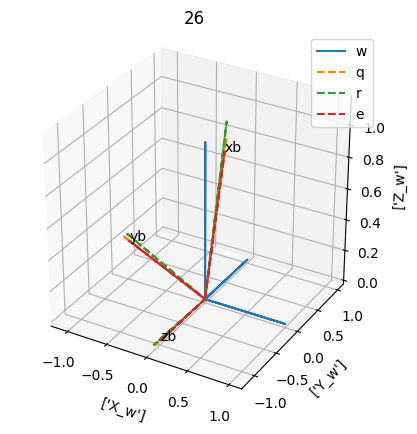

ang= 108.35619621760713

7.0299366960855876e-15 -76.10508203321274 89.5353906273091
dqq= [-0.17982585 -0.17924811 -0.22753555  0.22826893]


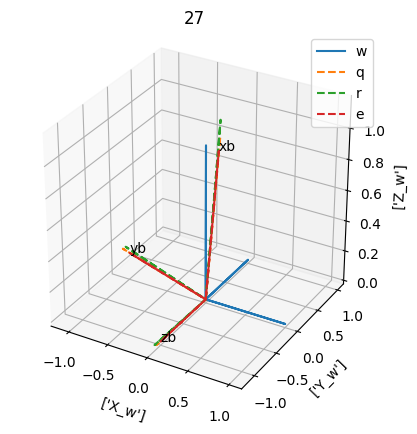

ang= 110.85618252633482

8.20418607644406e-15 -80.58185156457819 89.5353906273091
dqq= [-0.18878994 -0.18818341 -0.2204965   0.22120718]


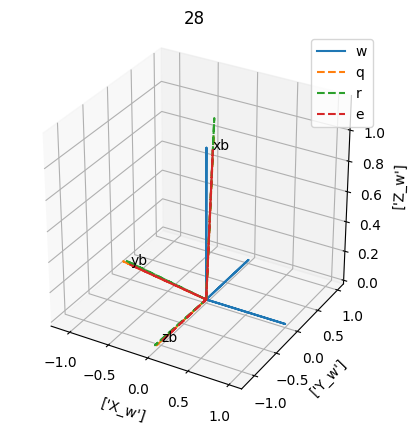

ang= 113.44120207188224

9.956505002998114e-15 -85.05862109594365 89.5353906273091
dqq= [-0.19747673 -0.19684229 -0.21310655  0.21379342]


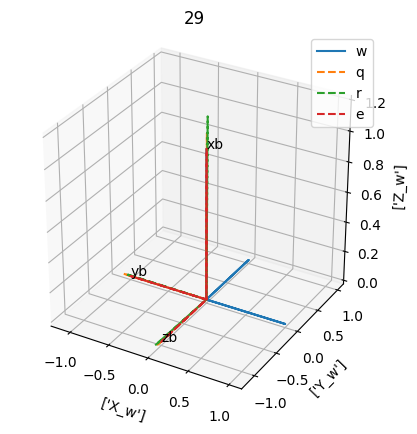

ang= 116.1050804088858

1.345033922721884e-14 -89.5353906273091 89.5353906273091
quat 0.028082308256755367
rotation mat 0.06172709817085739
euler 6.856590222767858e-32


In [12]:
q0=np.array([1,0,0,0])
R0=quat2mat(q0);
vx,vy,vz=xw,yw,zw
yaw0,pitch0,roll0=0,0,0


for i in range(len(w2)):
   # euler
    w22=w2[i]
    yaw,pitch,roll=yaw0,pitch0,roll0
    yaw,pitch,roll=eulerUpdate(yaw,pitch,roll,w22,0.1)
    R_eul=euler2mat(yaw,pitch,roll)

    vxe=R_eul@xw
    vye=R_eul@yw
    vze=R_eul@zw
#     print(vxe)
#     print(vye)
    
    #rotation matrix
    R=R0
    R=updateR1st(R,0.1,w22)

 
    vxr=np.transpose(R)@xw
    vyr=np.transpose(R)@yw
    vzr=np.transpose(R)@zw
    
    
    q=q0
    dqq=dq(q,w2[i])
    print('dqq=',dqq)
    q2=q+dqq*0.1
#     print('q before norm',q2)
    
    
    norm_q=np.sqrt(np.sum(q2**2))
#     q2=q2/norm_q
    vx=[quatRotVec(q2,xw),vxr, vxe]
    vz=[quatRotVec(q2,zw),vzr,vze]
    vy=[quatRotVec(q2,yw),vyr,vye]
#     print(vx)

    plotaxes(vx,vy,vz,i,['w','q','r','e'])
#     print('q after norm',q2, 'with norm ',norm_q)
#     print('q after norm',q2, 'with norm ',norm_q)
    print('ang=', 2*np.arccos(q2[0])*57)
#     print("angs=",mat2eul(quat2mat(q2))*57)
    print()
    q0=q2
    R0=R
    yaw0,pitch0,roll0=yaw,pitch,roll
    print(yaw*57,pitch*57,roll*57)
    
print("quat",np.sum((xw+vy[0])**2)+        np.sum((yw+vz[0])**2)+np.sum((zw-vx[0])**2))
print("rotation mat",np.sum((xw+vy[1])**2)+np.sum((yw+vz[1])**2)+np.sum((zw-vx[1])**2))
print("euler",np.sum((xw+vy[2])**2)+       np.sum((yw+vz[2])**2)+np.sum((zw-vx[2])**2))

dqq= [0.         0.         0.78539816 0.        ]


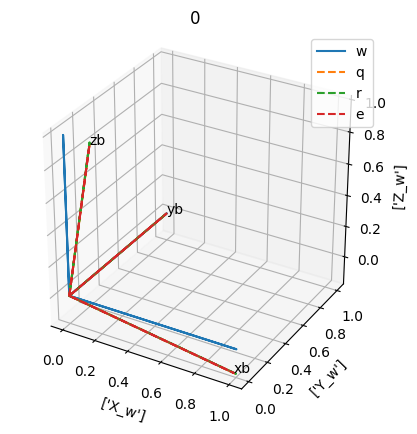

ang= 0.0

0.0 8.953539062730911 0.0
dqq= [-0.06168503  0.          0.78539816  0.        ]


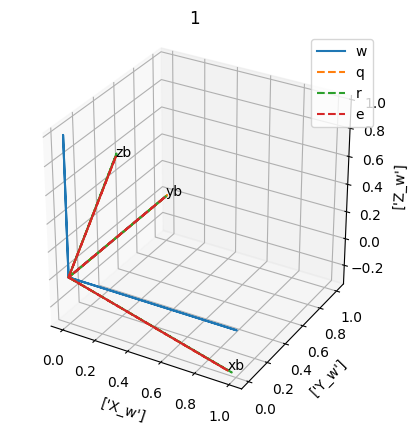

ang= 12.66873433388314

0.0 17.907078125461823 0.0
dqq= [-0.12337006  0.          0.78055343  0.        ]


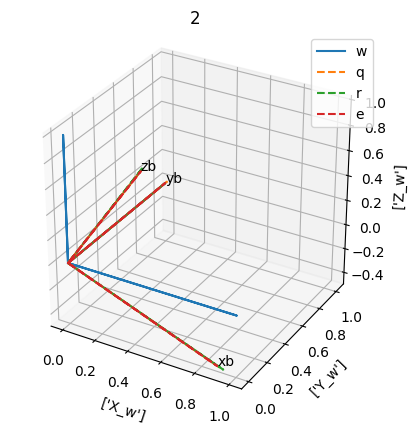

ang= 21.965564986268326

0.0 26.86061718819273 0.0
dqq= [-0.18467458  0.          0.77086397  0.        ]


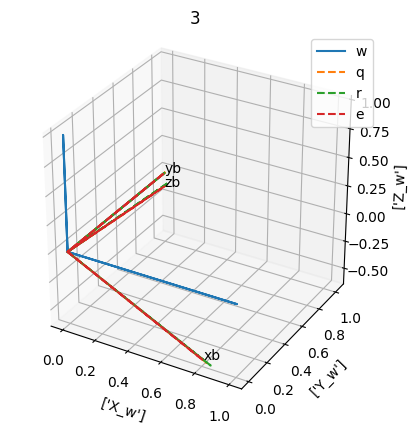

ang= 31.096338507196627

0.0 35.814156250923645 0.0
dqq= [-0.24521809  0.          0.75635966  0.        ]


ang= 40.18741338294964

0.0 44.76769531365455 0.0
dqq= [-0.30462244  0.          0.73710028  0.        ]


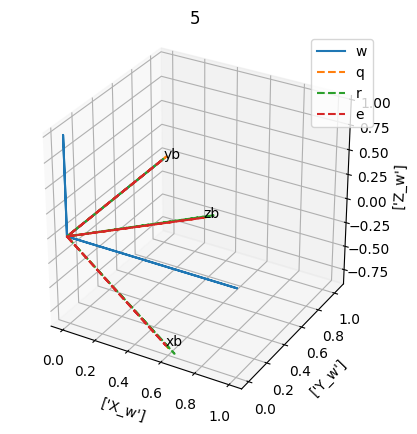

ang= 49.27174018165887

0.0 53.72123437638546 0.0
dqq= [-0.36251416  0.          0.71317529  0.        ]


ang= 58.36214621503334

0.0 62.67477343911637 0.0
dqq= [-0.41852682  0.          0.68470349  0.        ]


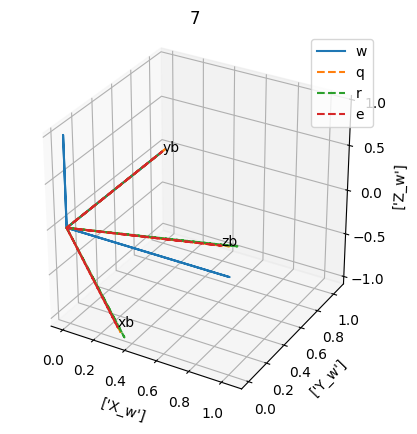

ang= 67.46499593416615

0.0 71.62831250184729 0.0
dqq= [-0.47230331  0.          0.65183247  0.        ]


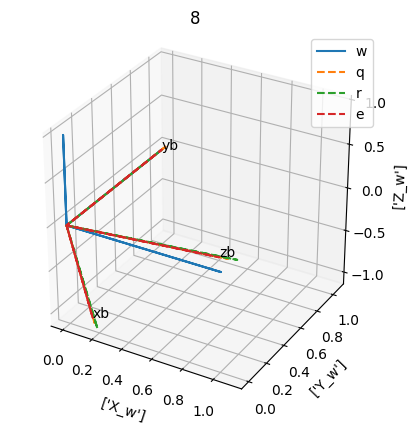

ang= 76.58411387269997

0.0 80.58185156457819 0.0
dqq= [-0.52349811  0.          0.61473786  0.        ]


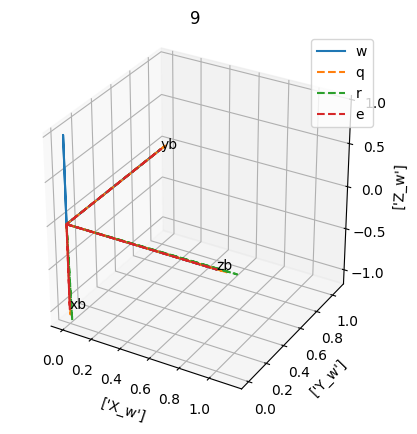

ang= 85.72222358252155

0.0 89.5353906273091 0.0
dqq= [0.         0.28588975 0.         0.28681121]


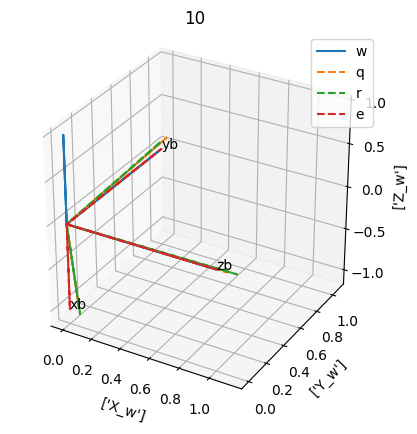

ang= 85.72222358252155

7.311119474582152e+16 89.5353906273091 7.311119474582152e+16
dqq= [-0.01126305  0.28588975 -0.01122686  0.28681121]


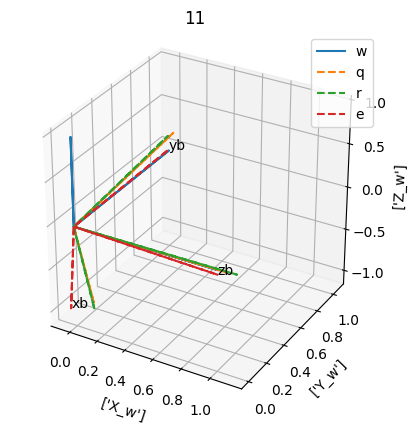

ang= 85.91003304110058

1.260996833560915e+17 86.45091710480827 1.260996833560915e+17
dqq= [-0.0225261   0.28544888 -0.02245373  0.28636891]


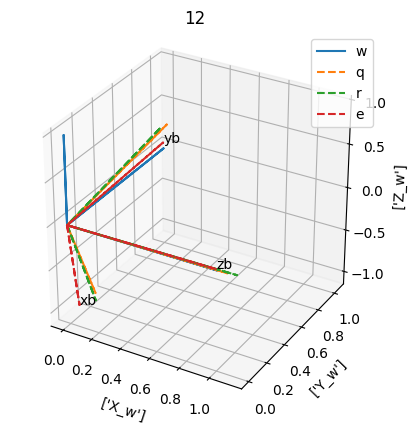

ang= 86.28466669979449

1.2609968335609141e+17 85.33148232397711 1.2609968335609141e+17
dqq= [-0.03377178  0.28456712 -0.03366328  0.28548431]


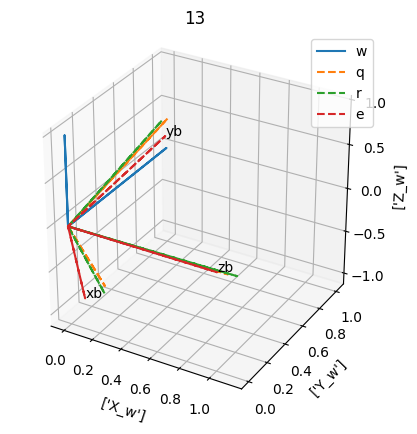

ang= 86.84390026035115

1.2609968335609142e+17 80.92860388229055 1.2609968335609142e+17
dqq= [-0.04498272  0.28324517 -0.0448382   0.2841581 ]


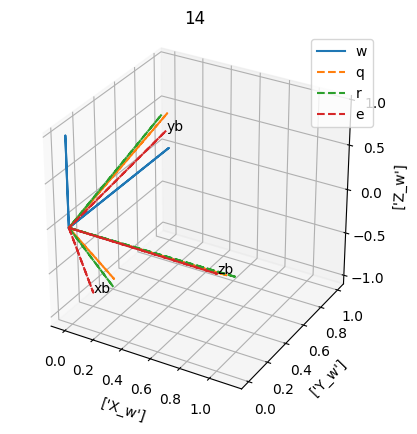

ang= 87.58434391835677

1.2609968335609142e+17 76.4621989591687 1.2609968335609142e+17
dqq= [-0.05614159  0.28148437 -0.05596122  0.28239163]


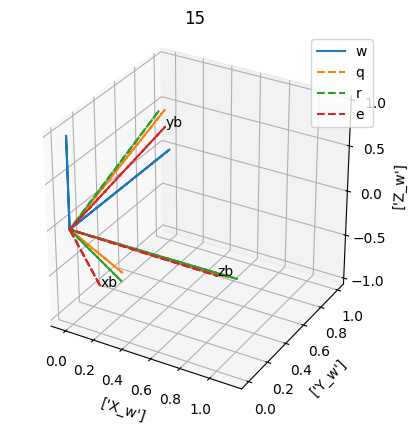

ang= 88.50154889022927

1.2609968335609142e+17 71.99579403604687 1.2609968335609142e+17
dqq= [-0.06723108  0.27928678 -0.06701508  0.28018695]


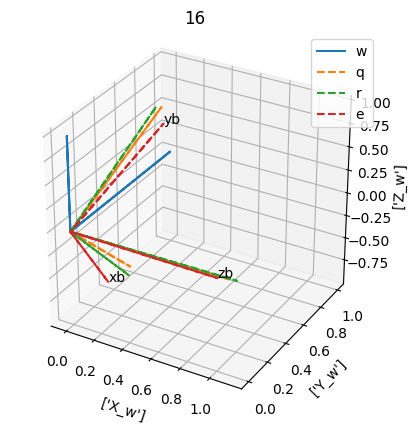

ang= 89.59013950398709

1.2609968335609142e+17 67.52938911292503 1.2609968335609142e+17
dqq= [-0.07823399  0.27665511 -0.07798265  0.27754679]


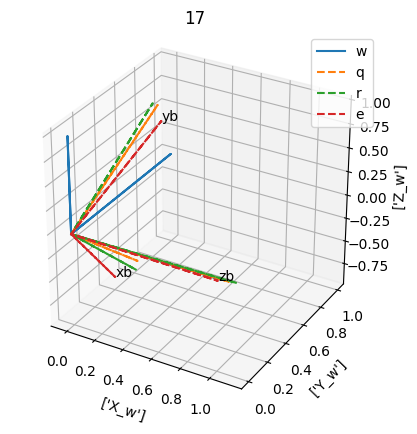

ang= 90.84396228265375

1.2609968335609142e+17 63.06298418980319 1.2609968335609142e+17
dqq= [-0.08913323  0.27359273 -0.08884687  0.27447455]


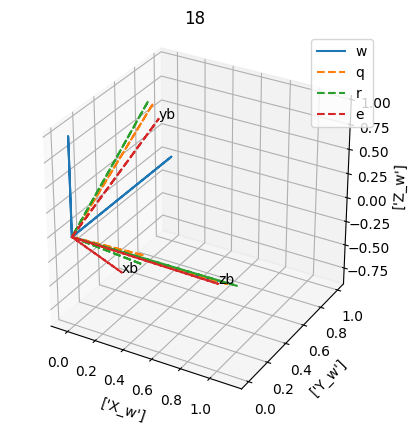

ang= 92.25624324034601

1.2609968335609142e+17 58.59657926668135 1.2609968335609142e+17
dqq= [-0.09991182  0.27010373 -0.09959083  0.2709743 ]


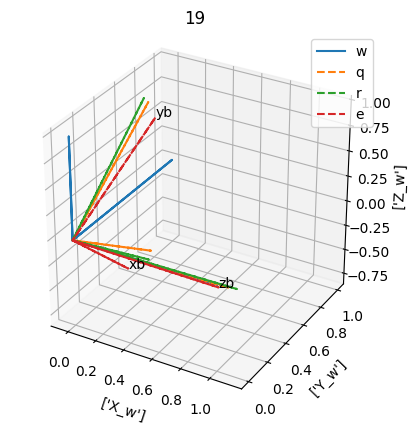

ang= 93.81974522838289

1.2609968335609142e+17 54.13017434355952 1.2609968335609142e+17
dqq= [-0.11055296  0.2661928  -0.11019778  0.26705077]


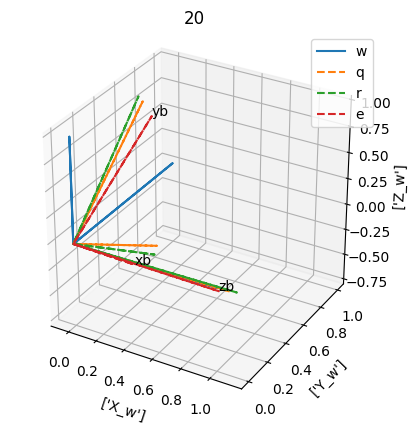

ang= 95.5269184027835

1.2609968335609142e+17 49.66376942043768 1.2609968335609142e+17
dqq= [-0.12104002  0.26186535 -0.12065115  0.26270937]


ang= 97.37003848017193

1.2609968335609142e+17 45.19736449731584 1.2609968335609142e+17
dqq= [-0.13135659  0.25712739 -0.13093457  0.25795614]


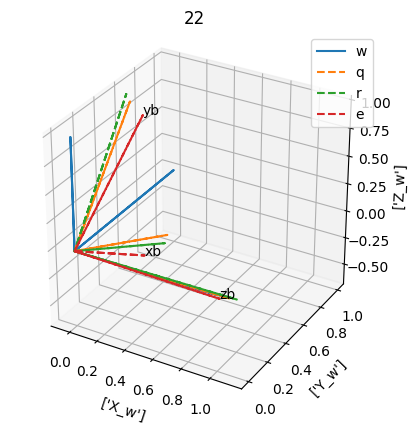

ang= 99.34132915873046

1.2609968335609142e+17 40.730959574194 1.2609968335609142e+17
dqq= [-0.1414865   0.2519856  -0.14103194  0.25279778]


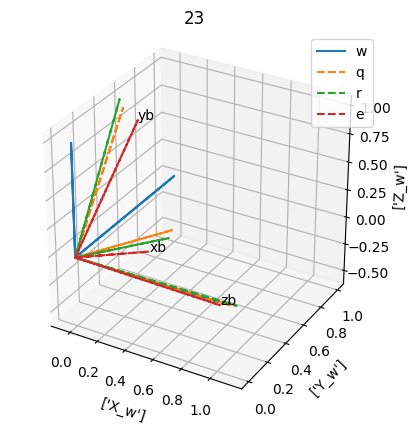

ang= 101.43306670232559

1.2609968335609142e+17 36.26455465107217 1.2609968335609142e+17
dqq= [-0.15141385  0.24644729 -0.15092739  0.24724161]


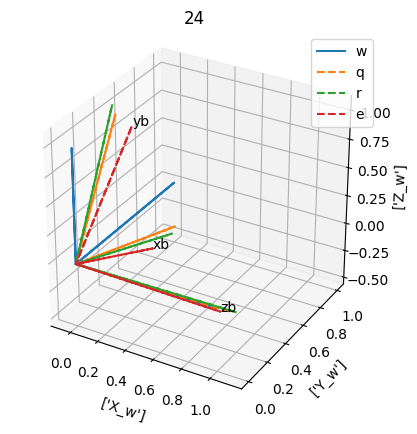

ang= 103.63766608146015

1.2609968335609142e+17 31.798149727950328 1.2609968335609142e+17
dqq= [-0.161123    0.24052038 -0.16060536  0.24129561]


ang= 105.94774916224844

1.2609968335609142e+17 27.33174480482849 1.2609968335609142e+17
dqq= [-0.17059866  0.23421342 -0.17005057  0.23496832]


ang= 108.35619621760713

1.2609968335609142e+17 22.86533988170665 1.2609968335609142e+17
dqq= [-0.17982585  0.22753555 -0.17924811  0.22826893]


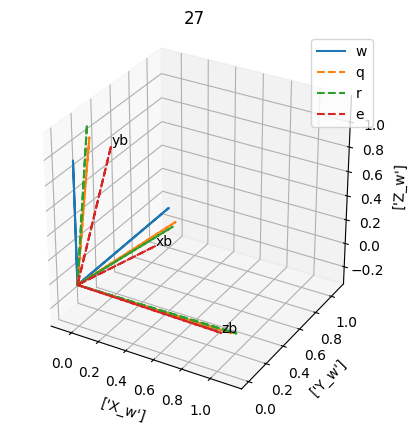

ang= 110.85618252633482

1.2609968335609142e+17 18.398934958584814 1.2609968335609142e+17
dqq= [-0.18878994  0.2204965  -0.18818341  0.22120718]


ang= 113.44120207188224

1.2609968335609142e+17 13.932530035462975 1.2609968335609142e+17
dqq= [-0.19747673  0.21310655 -0.19684229  0.21379342]


ang= 116.1050804088858

1.2609968335609142e+17 9.466125112341137 1.2609968335609142e+17
quat vector rotation erros 0.028082308256755367
rotation mat  vector rotation erros 0.06172709817085739
euler  vector rotation erros 0.07188772590217785

quat magnitude 1.0967094755604712 1.0940590505786394 1.100232913531808
rotation mat magnitude 1.0634272884163538 1.1892819402646762 1.1438997049673736
euler magnitude 0.9999999999999999 1.2097626698529105 0.9857014365936245


In [13]:
q0=np.array([1,0,0,0])
R0=quat2mat(q0);
vx,vy,vz=xw,yw,zw
yaw0,pitch0,roll0=0,0,0

vx_tot,vy_tot,vz_tot=[],[],[]

for i in range(len(w3)):
   # euler
    w33=w3[i]
    yaw,pitch,roll=yaw0,pitch0,roll0
    yaw,pitch,roll=eulerUpdate(yaw,pitch,roll,w33,0.1)
    R_eul=euler2mat(yaw,pitch,roll)

    vxe=R_eul@xw
    vye=R_eul@yw
    vze=R_eul@zw
    
    #rotation matrix
    R=R0
    R=updateR1st(R,0.1,w33)
    vxr=np.transpose(R)@xw
    vyr=np.transpose(R)@yw
    vzr=np.transpose(R)@zw
    
    
    q=q0
    dqq=dq(q,w3[i])
    print('dqq=',dqq)
    q2=q+dqq*0.1
#     print('q before norm',q2)
    
    
    norm_q=np.sqrt(np.sum(q2**2))
#     q2=q2/norm_q
    vx=[quatRotVec(q2,xw),vxr, vxe]
    vz=[quatRotVec(q2,zw),vzr,vze]
    vy=[quatRotVec(q2,yw),vyr,vye]
    
#     xb2=xb[i]
#     yb2=yb[i]
#     zb2=zb[i]
# #         print("thats good ",xb2)
#     ax.plot3D([0,vx[0],0,vy[0],0,vz[0],0],
#               [0,vx[1],0,vy[1],0,vz[1],0],
#               [0,vx[2],0,vy[2],0,vz[2],0],'--')
    zer=np.zeros(3)
    vx_tot.append([zer,quatRotVec(q2,xw),zer,vxr,zer, vxe,zer])
    vy_tot.append([zer,quatRotVec(q2,yw),zer,vyr,zer, vye,zer])
    vz_tot.append([zer,quatRotVec(q2,zw),zer,vzr,zer, vze,zer])
#     print(vx)

    plotaxes(vx,vy,vz,i,['w','q','r','e'])
#     print('q after norm',q2, 'with norm ',norm_q)
#     print('q after norm',q2, 'with norm ',norm_q)
    print('ang=', 2*np.arccos(q2[0])*57)
#     print("angs=",mat2eul(quat2mat(q2))*57)
    print()
    q0=q2
    R0=R
    yaw0,pitch0,roll0=yaw,pitch,roll
    print(yaw*57,pitch*57,roll*57)

print("quat vector rotation erros",np.sum((xw-vz[0])**2)+np.sum((yw-vx[0])**2)+np.sum((zw-vy[0])**2))
print("rotation mat  vector rotation erros",np.sum((xw-vz[1])**2)+np.sum((yw-vx[1])**2)+np.sum((zw-vy[1])**2))
print("euler  vector rotation erros",np.sum((xw-vz[2])**2)+np.sum((yw-vx[2])**2)+np.sum((zw-vy[2])**2))
print()
print("quat magnitude",np.sqrt(np.sum(vx[0]**2)),np.sqrt(np.sum(vy[0])**2),np.sqrt(np.sum(vz[0])**2))
print("rotation mat magnitude",np.sqrt(np.sum(vx[1]**2)),np.sqrt(np.sum(vy[1])**2),np.sqrt(np.sum(vz[1])**2))
print("euler magnitude",np.sqrt(np.sum(vx[2]**2)) ,np.sqrt(np.sum(vy[2])**2),np.sqrt(np.sum(vz[2])**2))

In [14]:
print("reg=",R0)
print("transpose=",np.transpose(R0))
print("x@reg=",R0@xw)
print("x@reg_tran=",np.transpose(R0)@xw)

reg= [[ 4.92121218e-05  1.06342026e+00 -3.86522650e-03]
 [-1.52930984e-02  3.42201209e-03  1.20115303e+00]
 [ 1.12951866e+00  0.00000000e+00  1.43810485e-02]]
transpose= [[ 4.92121218e-05 -1.52930984e-02  1.12951866e+00]
 [ 1.06342026e+00  3.42201209e-03  0.00000000e+00]
 [-3.86522650e-03  1.20115303e+00  1.43810485e-02]]
x@reg= [ 4.92121218e-05 -1.52930984e-02  1.12951866e+00]
x@reg_tran= [ 4.92121218e-05  1.06342026e+00 -3.86522650e-03]


## animation

(30, 7, 3)
hey 0
hey 0
hey 0
hey 1
hey 2
hey 3
hey 4
hey 5
hey 6
hey 7
hey 8
hey 9
hey 10
hey 11
hey 12
hey 13
hey 14
hey 15
hey 16
hey 17
hey 18
hey 19
hey 20
hey 21
hey 22
hey 23
hey 24
hey 25
hey 26
hey 27
hey 28
hey 29


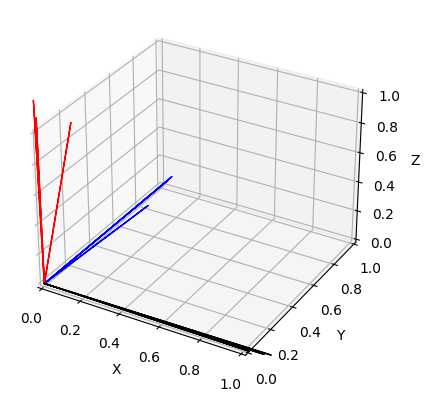

In [15]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter
# save animation at 20 frames per second 

# Fixing random state for reproducibility
np.random.seed(19680801)


# def random_walk(num_steps, max_step=0.05):
#     """Return a 3D random walk as (num_steps, 3) array."""
#     start_pos = np.random.random(3)
#     steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
#     walk = start_pos + np.cumsum(steps, axis=0)
#     return walk


def update_lines(num, vx_tot,vy_tot,vz_tot, lines1,lines2,lines3):
#     vx_tot,vy_tot,vz_tot, lines
    print("hey",num)
    xb=vx_tot[num]
    yb=vy_tot[num]
    zb=vz_tot[num]
    xb=np.transpose(np.array(xb))
    yb=np.transpose(np.array(yb))
    zb=np.transpose(np.array(zb))

    lines1.set_data_3d(xb)
#     lines2.set_color('b')
#     lines3.set(linewidth=2)
#     lines[1].set_data_3d(xb[1],yb[1],zb[1])
#     lines[1].set_color('r')
#     lines[1].set(linewidth=1)
#     lines[2].set_data_3d(xb[2],yb[2],zb[2])
#     lines[2].set_color('k')  
#     lines[2].set(linewidth=.2)
    
#     lines[0].set_data_3d(xb)
#     lines[0].set(linewidth=2)
#     lines[0].set_color('b')
    lines2.set_data_3d(yb)
#     lines[1].set(linewidth=1)
#     lines[1].set_color('r')
# #     lines[1].set_legend(['q','rot','eul'])
#     lines[1].set_label('rot')

    lines3.set_data_3d(zb)
#     lines[2].set(linewidth=.1)
#     lines[2].set_color('k')    
                                           
#     lines[0].set_color(['b','r','k')
#     lines[0].set_data_3d(np.transpose(np.array(xb)))
#     lines[0].set_color('k')
#     lines[1].set_data_3d(np.transpose(np.array(yb)))
#     lines[2].set_data_3d(np.transpose(np.array(zb)))
    

    return lines1,lines2,lines3


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = len(vx_tot)
# walks = [random_walk(num_steps) for index in range(40)]


# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
# lines = [ax.plot([], [], [])[0] for _ in [1,2,3]]
lines1=ax.plot([], [],[], color="b",lw=1,markersize=3,label='qu')[0]
lines2=ax.plot([], [], color="r",lw=1,markersize=3,label='rot')[0]
lines3=ax.plot([], [], color="k",lw=1,markersize=3,label='eul')[0]
print(np.shape(vx_tot))

# Setting the Axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')


# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines,  frames=num_steps, fargs=(vx_tot,vy_tot,vz_tot, lines1,lines2,lines3), interval=100, blit=True)
ani.save("lines.gif", dpi=300, writer=PillowWriter(fps=10))
# anim.save("sincos.gif", dpi=250, writer=PillowWriter(fps=20))
# plt.show()